<a href="https://colab.research.google.com/github/tej007-awesome/Twitter_sentiment_analysis/blob/main/pes_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Twitter Sentiment Analysis




We install wordcloud in order to visually represent the data.

In [1]:
!pip install wordcloud

Importing the necessary libraries

In [5]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

from termcolor import colored
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import re
import nltk
import numpy as np
import pandas as pd
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from termcolor import colored
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


We now import the dataset from kaggle.

In [4]:
!pip install kaggle

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle datasets download -d kazanova/sentiment140

 75% 61.0M/80.9M [00:00<00:00, 142MB/s]
100% 80.9M/80.9M [00:00<00:00, 144MB/s]


In [11]:
from zipfile import ZipFile  #extracting the dataset
dataset='/content/sentiment140.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


### **Data Analysis**


We now do the sentiment analysis. The given dataset has positive and negative sentiment values.

In [12]:
column_names=['Sentiment','Id','Date','Flag','User','Tweet']
twitter_data=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',names=column_names, encoding='ISO-8859-1')

In [12]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1600000 non-null  int64 
 1   Id         1600000 non-null  int64 
 2   Date       1600000 non-null  object
 3   Flag       1600000 non-null  object
 4   User       1600000 non-null  object
 5   Tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In the code below, we can see the distribution of the positive and negative sentiments. It is distributed between positive(4) and negative(0) tweets

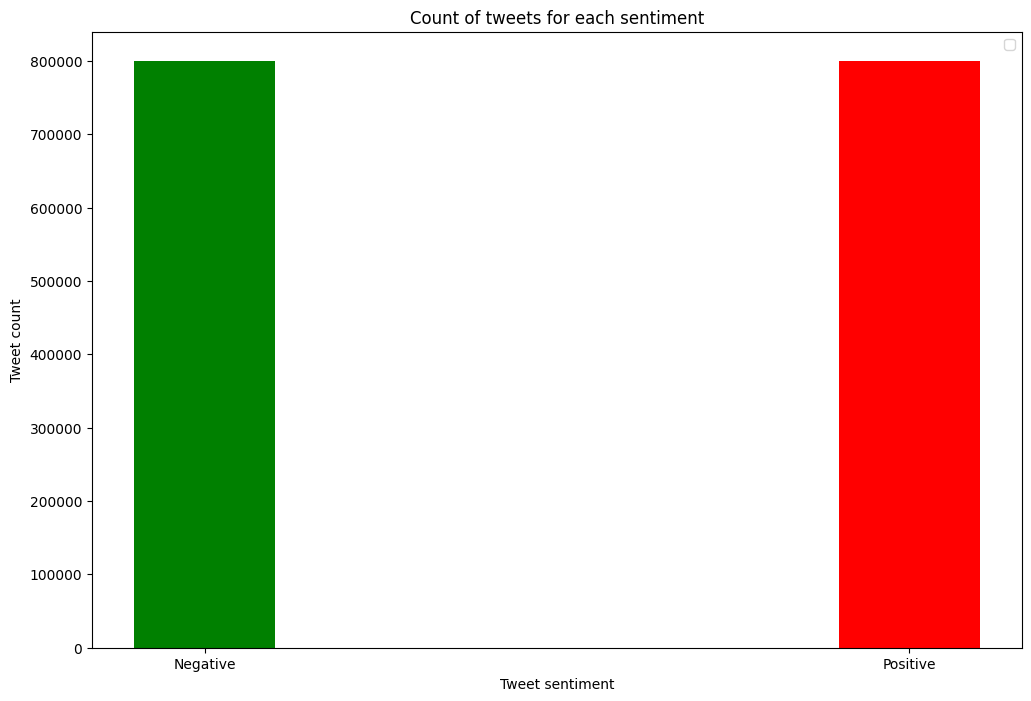

In [13]:
class_count = twitter_data['Sentiment'].value_counts() # Returned in descending order [4, 0]
plt.figure(figsize = (12, 8))
plt.xticks([4, 0], ['Positive', 'Negative'])
plt.xticks([4, 0])
plt.bar(x = class_count.keys(),
        height = class_count.values,
        color = ['g', 'r'])
plt.xlabel("Tweet sentiment")
plt.ylabel("Tweet count")
plt.title("Count of tweets for each sentiment")
plt.legend()

In [14]:
twitter_data['Month'] = twitter_data['Date'].apply(lambda date: date.split(' ')[1])
months_count = twitter_data['Month'].value_counts()

Here, we can view the tweets based on dates. The maximum tweets is during the month of January.

Text(0.5, 1.0, 'Tweets during months of 2009')

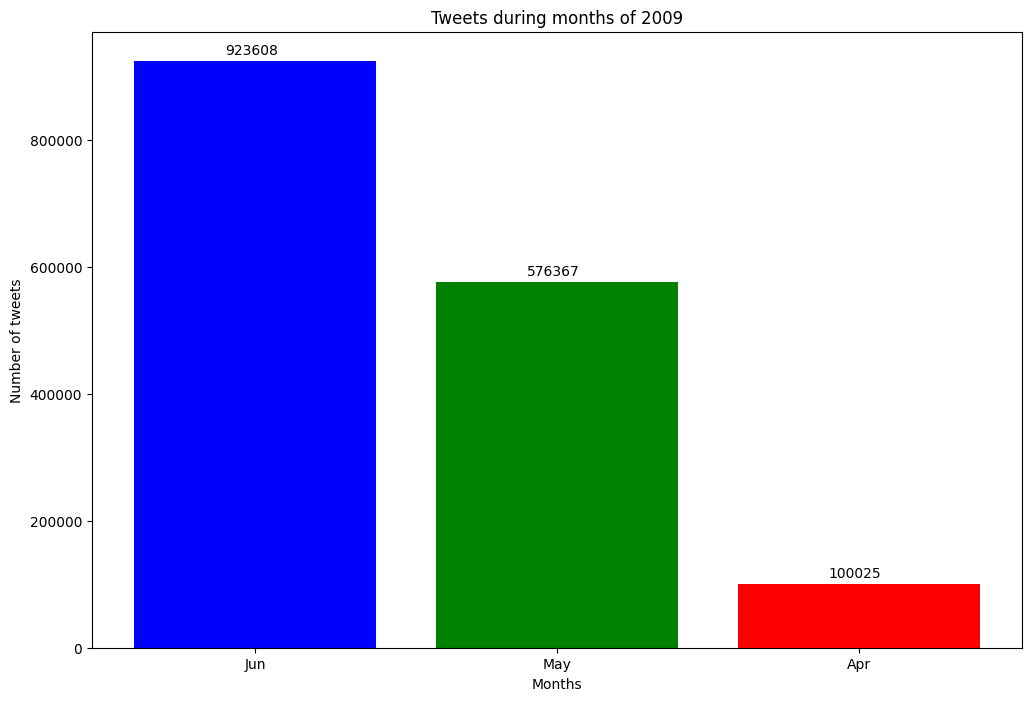

In [15]:
plt.figure(figsize = (12, 8))
plt.bar(['Jun', 'May', 'Apr'], months_count.values, color = ['b', 'g', 'r'])
for i, v in enumerate(months_count.values):
    plt.text(i - 0.1, v + 10000, str(v))
plt.xlabel('Months')
plt.ylabel('Number of tweets')
plt.title('Tweets during months of 2009')

In [17]:
print(twitter_data['Tweet'][0])
print(twitter_data['Tweet'][1])

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!


We now use wordcloud to get a visual representation of thepositive tweets. These are the top words for each tweet sentiment.

Text(0.5, 1.0, 'Positive tweets Wordcloud')

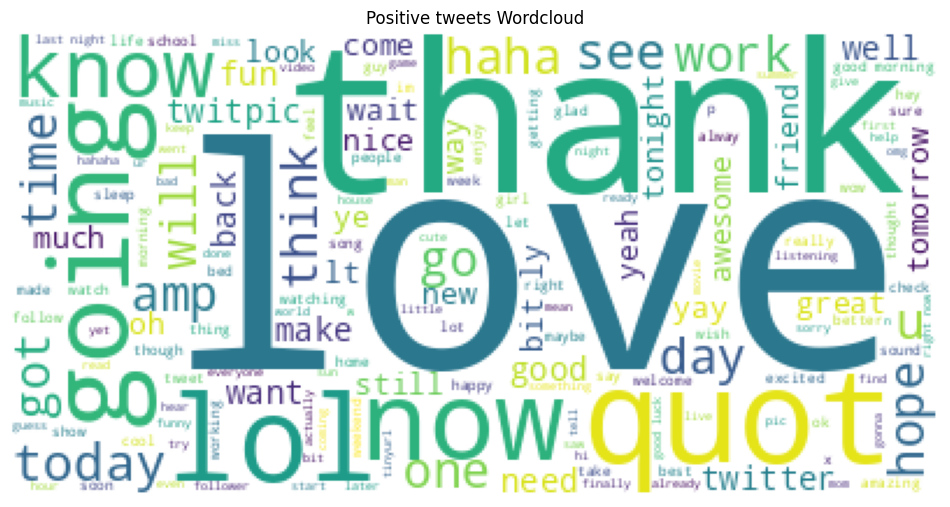

In [20]:
positive_tweets = ' '.join(twitter_data[twitter_data['Sentiment'] == 4]['Tweet'].str.lower())
negative_tweets = ' '.join(twitter_data[twitter_data['Sentiment'] == 0]['Tweet'].str.lower())
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(positive_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive tweets Wordcloud")

We do the same process for negative tweets.

Text(0.5, 1.0, 'Negative tweets Wordcloud')

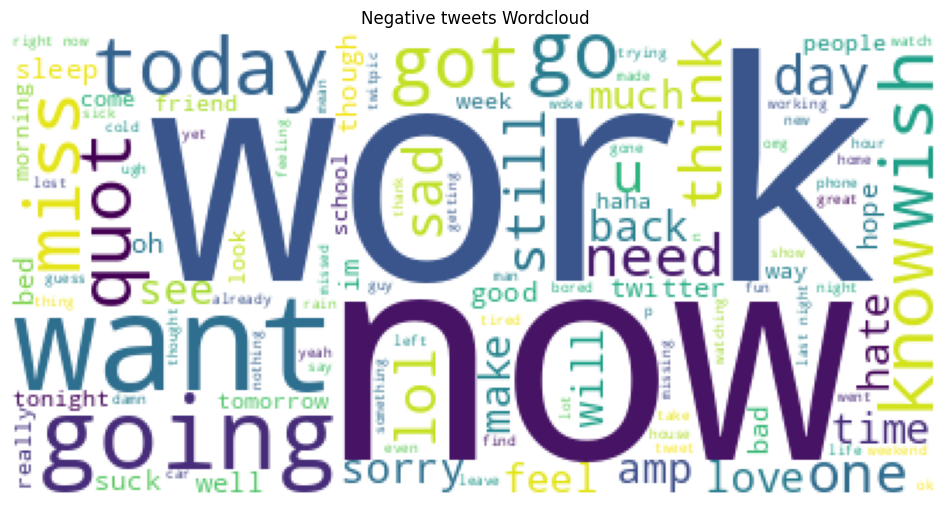

In [21]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(negative_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negative tweets Wordcloud")

### Train-test split


Splitting the dataset for training and testing in an 80:20 ratio. We the save the train and test dataset csv files.

In [13]:
# Define variables
COLUMNS = ['Sentiment', 'Id', 'Date', 'Flag', 'User', 'Tweet']

# Read dataset
dataset = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', names=COLUMNS, encoding='latin-1')
print(colored("Columns: {}".format(', '.join(COLUMNS)), "yellow"))

# Remove extra columns
print(colored("Useful columns: Sentiment and Tweet", "yellow"))
print(colored("Removing other columns", "red"))
dataset = dataset[['Sentiment', 'Tweet']]
print(colored("Columns removed", "red"))

# Train test split
print(colored("Splitting train and test dataset into 80:20", "yellow"))
X_train, X_test, y_train, y_test = train_test_split(dataset['Tweet'], dataset['Sentiment'], test_size=0.20, random_state=100)

train_dataset = pd.DataFrame({'Tweet': X_train, 'Sentiment': y_train})
print(colored("Train data distribution:", "yellow"))
print(train_dataset['Sentiment'].value_counts())

test_dataset = pd.DataFrame({'Tweet': X_test, 'Sentiment': y_test})
print(colored("Test data distribution:", "yellow"))
print(test_dataset['Sentiment'].value_counts())

print(colored("Split complete", "yellow"))

# Save train data
print(colored("Saving train data", "yellow"))
train_dataset.to_csv('/content/train_data.csv', index=False)
print(colored("Train data saved to /content/train_data.csv", "green"))

# Save test data
print(colored("Saving test data", "yellow"))
test_dataset.to_csv('/content/test_data.csv', index=False)
print(colored("Test data saved to /content/test_data.csv", "green"))

Columns: Sentiment, Id, Date, Flag, User, Tweet
Useful columns: Sentiment and Tweet
Removing other columns
Columns removed
Splitting train and test dataset into 80:20
Train data distribution:
Sentiment
4    640434
0    639566
Name: count, dtype: int64
Test data distribution:
Sentiment
0    160434
4    159566
Name: count, dtype: int64
Split complete
Saving train data
Train data saved to /content/train_data.csv
Saving test data
Test data saved to /content/test_data.csv


### **Data Preprocessing**

We define a function clean_tweet() that performs the following preprocessing steps on the input data:
* Converts the 'Tweet' column to string.
* Removes user handles starting with '@'.
* Removes numbers and special characters
* Removes URLs.
* Tokenizes the tweets.
* Lemmatizes the words using the WordNetLemmatizer.
* Optionally, stems the words using the PorterStemmer.
* Combines the processed words back into tweets.







In [14]:
# Import datasets
print("Loading data")
train_data = pd.read_csv('/content/train_data.csv')
test_data = pd.read_csv('/content/test_data.csv')

# Setting stopwords
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.remove("not")

# Function to expand tweet
def expand_tweet(tweet):
	expanded_tweet = []
	for word in tweet:
		if re.search("n't", word):
			expanded_tweet.append(word.split("n't")[0])
			expanded_tweet.append("not")
		else:
			expanded_tweet.append(word)
	return expanded_tweet

# Function to process tweets
def clean_tweet(data, wordNetLemmatizer, porterStemmer):
    data['Clean_tweet'] = data['Tweet'].astype(str)  # Convert 'Tweet' column to string

    print(colored("Removing user handles starting with @", "yellow"))
    data['Clean_tweet'] = data['Clean_tweet'].str.replace("@[\w]*", "")

    print(colored("Removing numbers and special characters", "yellow"))
    data['Clean_tweet'] = data['Clean_tweet'].str.replace("[^a-zA-Z\s']", "")

    print(colored("Removing urls", "yellow"))
    data['Clean_tweet'] = data['Clean_tweet'].str.replace(r"https?://[^\s]+", "", regex=True)

    print(colored("Tokenizing", "yellow"))
    data['Clean_tweet'] = data['Clean_tweet'].str.split()

    print(colored("Lemmatizing the words", "yellow"))
    data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: [wordNetLemmatizer.lemmatize(word) for word in tweet])

    print(colored("Stemming the words (Optional)", "yellow"))
    data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: [porterStemmer.stem(word) for word in tweet])

    print(colored("Combining words back to tweets", "yellow"))
    data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: ' '.join(tweet))

    return data




# Define processing methods
wordNetLemmatizer = WordNetLemmatizer()
porterStemmer = PorterStemmer()

# Pre-processing the tweets
print(colored("Processing train data", "green"))
train_data = clean_tweet(train_data, wordNetLemmatizer, porterStemmer)
train_data.to_csv('/content/clean_train.csv', index = False)
print(colored("Train data processed and saved to data/clean_train.csv", "green"))
print(colored("Processing test data", "green"))
test_data = clean_tweet(test_data, wordNetLemmatizer, porterStemmer)
test_data.to_csv('/content/clean_test.csv', index = False)
print(colored("Test data processed and saved to data/clean_test.csv", "green"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading data
Processing train data
Removing user handles starting with @
Removing numbers and special characters
Removing urls
Tokenizing
Lemmatizing the words
Stemming the words (Optional)
Combining words back to tweets
Train data processed and saved to data/clean_train.csv
Processing test data
Removing user handles starting with @
Removing numbers and special characters
Removing urls
Tokenizing
Lemmatizing the words
Stemming the words (Optional)
Combining words back to tweets
Test data processed and saved to data/clean_test.csv


### Random Classifier model

We have used a random classifier model. It makes predictions by randomly guessing the class labels. Since in this case we have a binary classification problem (two classes), a random classifier will assign class labels with an equal probability of 0.5 (50%) for each class.

In [15]:
# Load the cleaned datasets
clean_train = pd.read_csv('/content/clean_train.csv')
clean_test = pd.read_csv('/content/clean_test.csv')

# Split the data into features and labels
X_train = clean_train['Clean_tweet']
y_train = clean_train['Sentiment']
X_test = clean_test['Clean_tweet']
y_test = clean_test['Sentiment']

# Create and train the random classifier
print(colored("Training random classifier model", "green"))
random_clf = DummyClassifier(strategy='uniform')
random_clf.fit(X_train, y_train)

# Evaluate the random classifier on the test set
y_pred = random_clf.predict(X_test)

print(colored("Evaluating random classifier model", "green"))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

Training random classifier model
Evaluating random classifier model
Accuracy: 0.4996
Precision: 0.4997
Recall: 0.4996
F1-score: 0.4997


### **Training Using LSTM**

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from termcolor import colored

# Load the cleaned datasets
clean_train = pd.read_csv('/content/clean_train.csv')
clean_test = pd.read_csv('/content/clean_test.csv')

# Split the data into features and labels
X_train = clean_train['Clean_tweet']
y_train = clean_train['Sentiment']
X_test = clean_test['Clean_tweet']
y_test = clean_test['Sentiment']

# Tokenize the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Create the LSTM model
model = Sequential()
model.add(Embedding(10000, 128, input_length=max_length))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
print(colored("Training LSTM model", "green"))
model.fit(X_train_pad, y_train, epochs=3, batch_size=32, validation_data=(X_test_pad, y_test))

# Evaluate the LSTM model on the test set
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

print(colored("Evaluating LSTM model", "green"))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")

KeyboardInterrupt: 

### Training Using Logistic Regression model

In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from termcolor import colored

# Load the cleaned datasets
clean_train = pd.read_csv('/content/clean_train.csv')
clean_test = pd.read_csv('/content/clean_test.csv')

# Split the data into features and labels
X_train = clean_train['Clean_tweet']
y_train = (clean_train['Sentiment'] == 4).astype(int)  # Convert labels to binary (0 or 1)
X_test = clean_test['Clean_tweet']
y_test = (clean_test['Sentiment'] == 4).astype(int)
# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test)

# Train the logistic regression model
print(colored("Training logistic regression model", "green"))
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Evaluate the logistic regression model on the test set
y_pred = lr_model.predict(X_test_tfidf)

print(colored("Evaluating logistic regression model", "green"))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")

Training logistic regression model
Evaluating logistic regression model
Accuracy: 0.7986
Precision: 0.7917
Recall: 0.8088
F1-score: 0.8002
